In [1]:
import sys
sys.path

['D:\\bio\\jupyter_code\\STARmap',
 'D:\\anaconda\\envs\\STalign\\python310.zip',
 'D:\\anaconda\\envs\\STalign\\DLLs',
 'D:\\anaconda\\envs\\STalign\\lib',
 'D:\\anaconda\\envs\\STalign',
 '',
 'C:\\Users\\23147\\AppData\\Roaming\\Python\\Python310\\site-packages',
 'D:\\anaconda\\envs\\STalign\\lib\\site-packages',
 'D:\\anaconda\\envs\\STalign\\lib\\site-packages\\win32',
 'D:\\anaconda\\envs\\STalign\\lib\\site-packages\\win32\\lib',
 'D:\\anaconda\\envs\\STalign\\lib\\site-packages\\Pythonwin']

In [2]:
# import dependencies
import sys
import numpy as np
import pandas as pd
import scanpy as sc

import os
print(os.getcwd())#显示当前路径
os.chdir('D:/bio/STalign/STalign-main')#更改路径，''里面为更改的路径
print(os.getcwd())#显示当前路径

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,10)  # make plots bigger

import torch
if torch.cuda.is_available():
    print('cuda is available')
    torch.set_default_device('cuda:0')
else:
    torch.set_default_device('cpu')
# import STalign after pip install
from STalign import STalign

D:\bio\jupyter_code\STARmap
D:\bio\STalign\STalign-main
cuda is available


In [3]:
# param
# 'BZ5' 'BZ9' 'BZ14'
source_dataset = 'BZ5'
target_dataset = 'BZ14'
input_dir = 'G:/dataset/STARmap/input/'
output_dir = 'G:/dataset/STARmap/output/STalign/'
# image_path = '/spatial/tissue_hires_image.png'
# position_path = '/tissue_positions_list.csv'

# image_files = ['D:/dataset/'+datasets[0]+'/spatial/tissue_hires_image.png', 'D:/dataset/'+datasets[1]+'/spatial/tissue_hires_image.png']
# position_files = ['D:/dataset/'+datasets[0]+'/spatial/tissue_positions_list.csv', 'D:/dataset/'+datasets[0]+'/spatial/tissue_positions_list.csv']

## load source_dataset

In [4]:
# # load position file
# df_source = pd.read_csv(input_dir + source_dataset + position_path, header=None)
# print(df_source.head())
# print(len(df_source))

In [5]:
adata_source = sc.read_h5ad(input_dir+source_dataset+'/'+source_dataset+'.h5ad')
df_source = adata_source.obs.loc[:,['x','y']]
del adata_source
print(df_source.head())
df_source = df_source.dropna()
print(df_source.head())
print(len(df_source))

            x            y
1   68.863744  4486.028897
2         NaN          NaN
3   92.843758  1062.676073
4         NaN          NaN
5  142.825567  3444.635063
            x            y
1   68.863744  4486.028897
3   92.843758  1062.676073
5  142.825567  3444.635063
6   88.189084  4092.440936
7  119.932512  4293.438757
1049


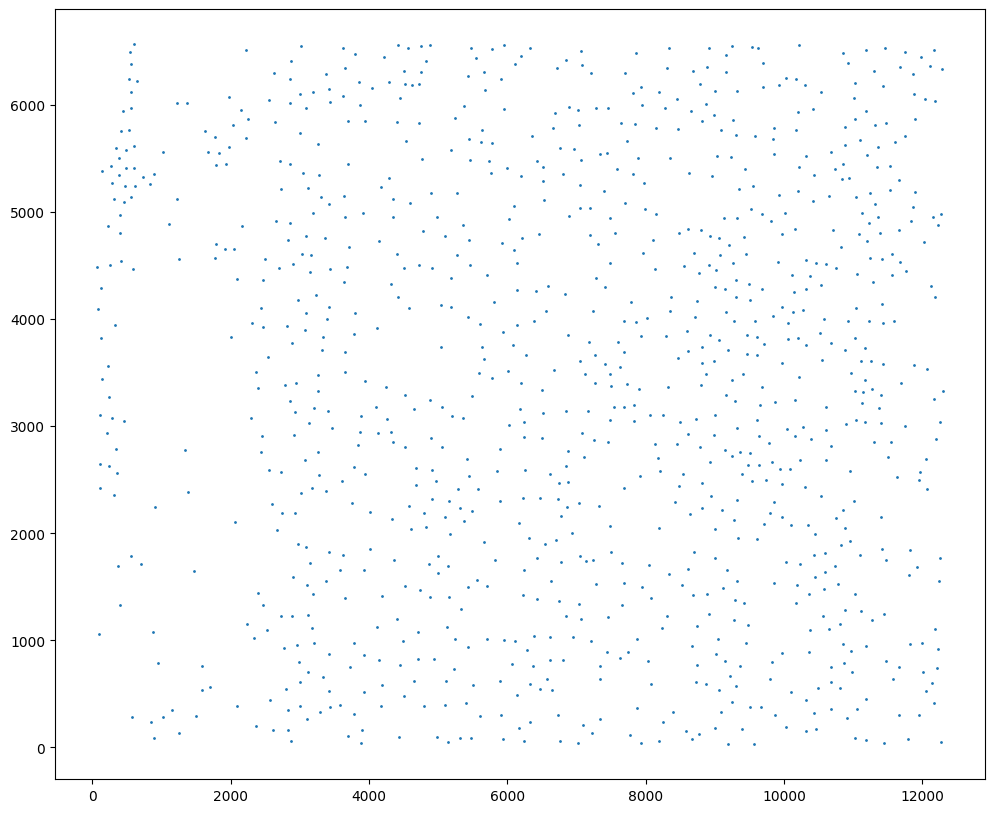

In [6]:
# get cell centroid coordinates
xI = np.array(df_source['x'])
yI = np.array(df_source['y'])

# plot
fig,ax = plt.subplots()
ax.scatter(xI,yI,s=1,alpha=1)

0 of 1049
1048 of 1049


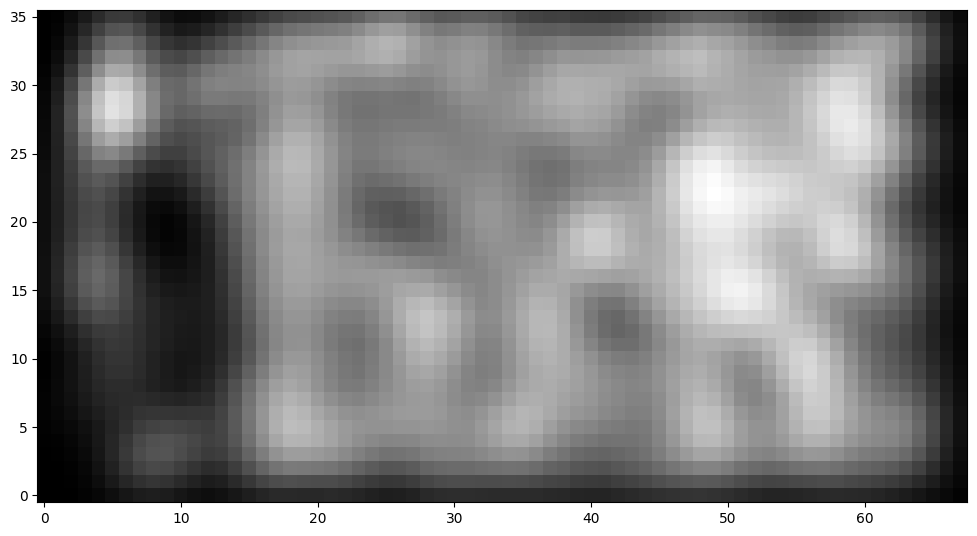

In [7]:
# rasterize at 100um resolution so image looks smooth
XI,YI,I,fig = STalign.rasterize(xI,yI,dx=200)

# plot
ax = fig.axes[0]
ax.invert_yaxis()

## load target dataset

In [8]:
# # load position file
# df_target = pd.read_csv(input_dir + target_dataset + position_path, header=None)
# print(df_target.head())
# print(len(df_target))

# # import scanpy as sc
# # adata = sc.read_visium(input_dir+target_dataset)
# # df_target = df_source[df_source[0].isin(adata.obs.index.tolist())]
# # df_target = df_target.reset_index(drop=True)
# # del adata
# # print(len(df_target))

In [9]:
adata_target = sc.read_h5ad(input_dir+target_dataset+'/'+target_dataset+'.h5ad')
df_target = adata_target.obs.loc[:,['x','y']]
del adata_target
print(df_target.head())
df_target = df_target.dropna()
print(df_target.head())
print(len(df_target))

           x            y
1        NaN          NaN
2        NaN          NaN
3        NaN          NaN
4  47.487014  2552.712465
5        NaN          NaN
             x            y
4    47.487014  2552.712465
9    69.108555  6220.878702
10   83.638439  2247.792100
13  117.192515    53.849495
14  157.073169  3715.092949
1088


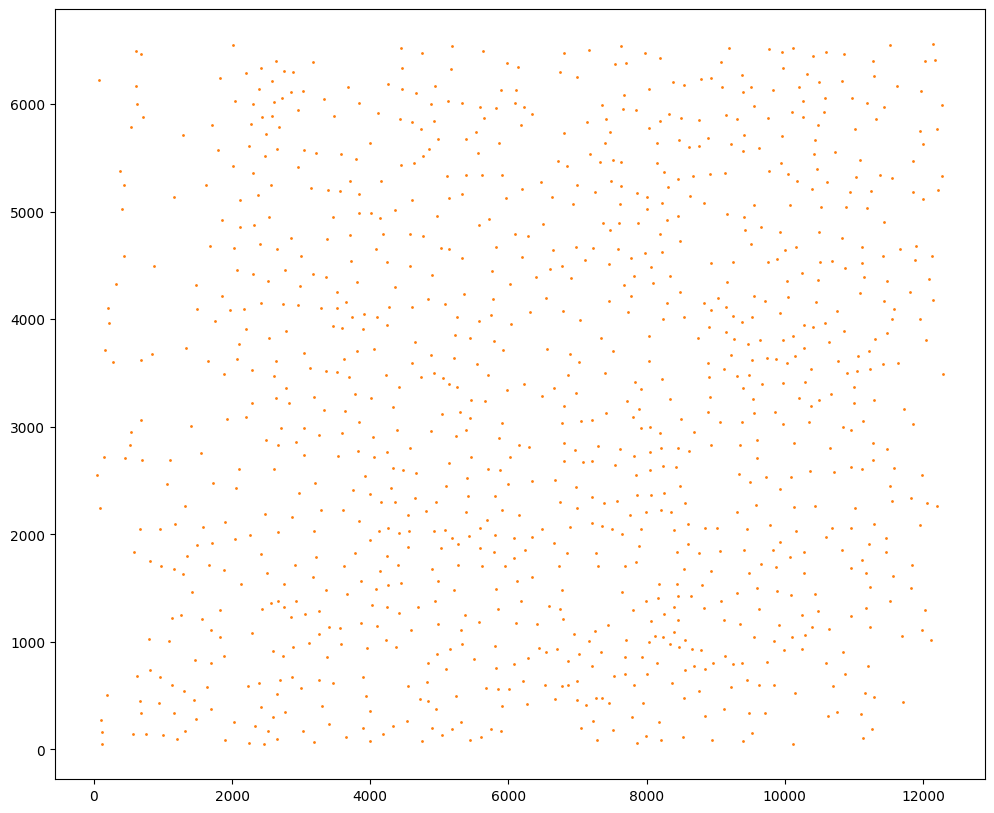

In [10]:
# get cell centroids
xJ = np.array(df_target['x'])
yJ = np.array(df_target['y'])

# plot
fig,ax = plt.subplots()
ax.scatter(xJ,yJ,s=1,alpha=1,c='#ff7f0e')

0 of 1088
1087 of 1088


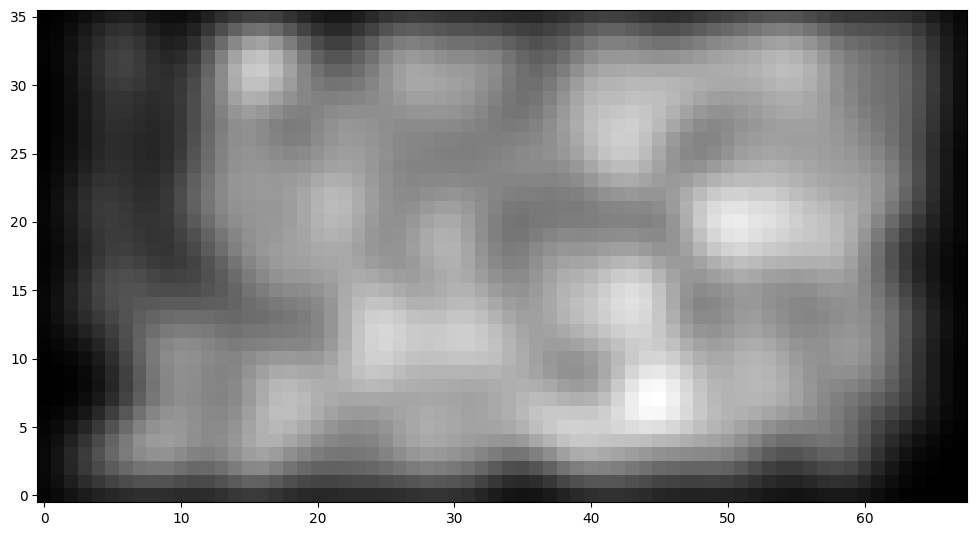

In [11]:
# rasterize and plot
XJ,YJ,J,fig = STalign.rasterize(xJ,yJ,dx=200)
ax = fig.axes[0]
ax.invert_yaxis()

### visualization

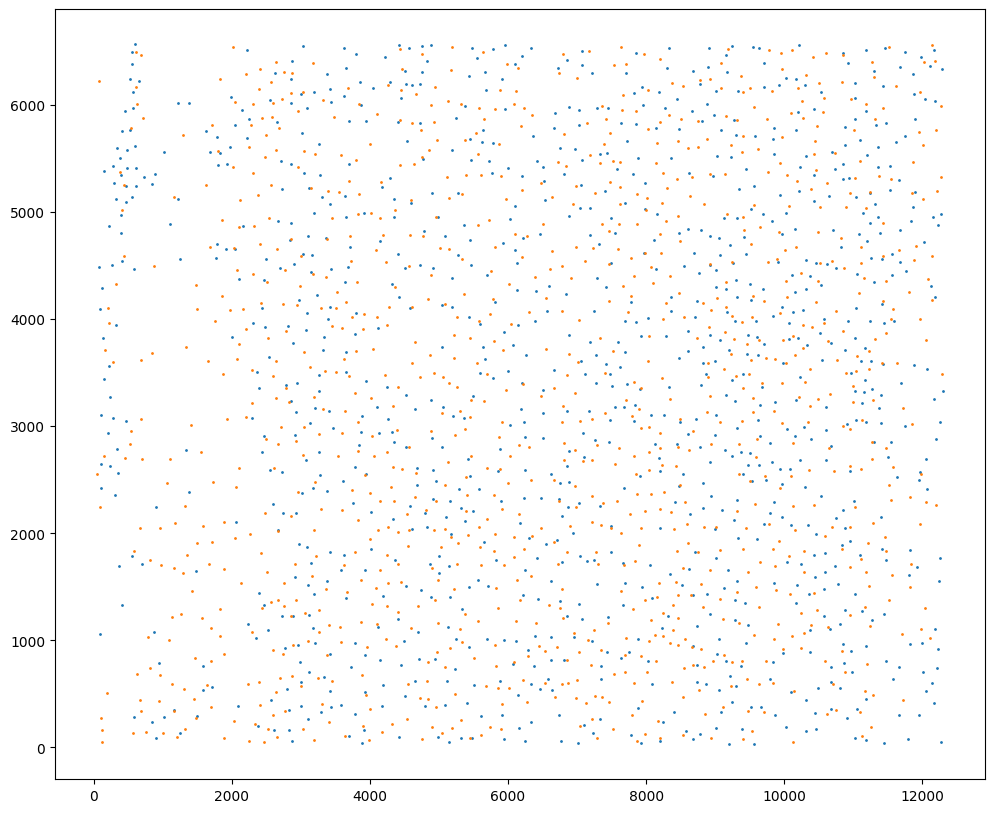

In [12]:
# plot
fig,ax = plt.subplots()
ax.scatter(xI,yI,s=1,alpha=1)
ax.scatter(xJ,yJ,s=1,alpha=1)

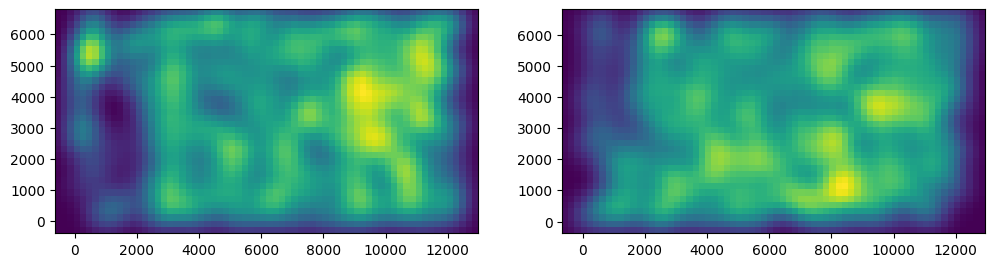

In [13]:
# get extent of images
extentI = STalign.extent_from_x((YI,XI))
extentJ = STalign.extent_from_x((YJ,XJ))

# plot rasterized images
fig,ax = plt.subplots(1,2)
ax[0].imshow((I.transpose(1,2,0).squeeze()), extent=extentI)
ax[1].imshow((J.transpose(1,2,0).squeeze()), extent=extentJ)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

## run STAlign

In [ ]:
%%time

# run LDDMM
# specify device (default device for STalign.LDDMM is cpu)
if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'

Ifoo = np.vstack((I, I, I)) # make RGB instead of greyscale
Jfoo = np.vstack((J, J, J)) # make RGB instead of greyscale

out = STalign.LDDMM([YI,XI],Ifoo,[YJ,XJ],Jfoo, dtype=torch.float32,device=device)


# keep all other parameters default
# params = {
#           'niter':1000,
#           'device':device,
#           'diffeo_start':100,
#           'a':250,
#           'epV':1000,
#           'sigmaB':0.1,
#           'muB': torch.tensor([0,0,0]), # black is background in target
#           }

# out = STalign.LDDMM([YI,XI],Ifoo,[YJ,XJ],Jfoo,**params)

D:\anaconda\envs\STalign\lib\site-packages\torch\utils\_device.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
D:\anaconda\envs\STalign\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
D:\bio\STalign\STalign-main\STalign\STalign.py:1280: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axE[2].set_yscale('log')


In [ ]:
# get necessary output variables
A = out['A']
v = out['v']
xv = out['xv']

In [ ]:
print(type(xv[0][0]))
print(xv[0].dtype)
print(type(v))
print(type(A))
print(type(YI[0]))
print(type(XI[0]))
print(type(Ifoo[0][0][0]))
print(type(YJ[0]))
print(type(XJ[0]))
print(type(XJ[0]))

In [ ]:
import importlib
importlib.reload(STalign)

In [ ]:
# apply transform
phii = STalign.build_transform(xv,v,A,XJ=[YJ,XJ],direction='b',dtype=torch.float32)
phiI = STalign.transform_image_atlas_to_target(xv,v,A,[YI,XI],Ifoo,[YJ,XJ],dtype=torch.float32)

# plot with grids
fig,ax = plt.subplots()
levels = np.arange(-20000,20000,100)
if phii.is_cuda:
    ax.contour(XJ,YJ,phii[...,0].cpu(),colors='r',linestyles='-',levels=levels)
    ax.contour(XJ,YJ,phii[...,1].cpu(),colors='g',linestyles='-',levels=levels)
else:
    ax.contour(XJ,YJ,phii[...,0],colors='r',linestyles='-',levels=levels)
    ax.contour(XJ,YJ,phii[...,1],colors='g',linestyles='-',levels=levels)
ax.set_aspect('equal')
ax.set_title('source to target')
if phiI.is_cuda:
    ax.imshow(phiI.cpu().permute(1,2,0)/torch.max(phiI.cpu()),extent=extentJ)
else:
    ax.imshow(phiI.permute(1,2,0)/torch.max(phiI),extent=extentJ)
ax.invert_yaxis()

In [ ]:
# # transform is invertible
# phi = STalign.build_transform(xv,v,A,XJ=[YI,XI],direction='f')
# phiiJ = STalign.transform_image_target_to_atlas(xv,v,A,[YJ,XJ],Jfoo,[YI,XI])

# # plot with grids
# fig,ax = plt.subplots()
# levels = np.arange(-100000,100000,1000)

# if phi.is_cuda:
#     ax.contour(XJ,YJ,phi[...,0].cpu(),colors='r',linestyles='-',levels=levels)
#     ax.contour(XJ,YJ,phi[...,1].cpu(),colors='g',linestyles='-',levels=levels)
# else:
#     ax.contour(XJ,YJ,phi[...,0],colors='r',linestyles='-',levels=levels)
#     ax.contour(XJ,YJ,phi[...,1],colors='g',linestyles='-',levels=levels)
# # ax.contour(XI,YI,phi[...,0],colors='r',linestyles='-',levels=levels)
# # ax.contour(XI,YI,phi[...,1],colors='g',linestyles='-',levels=levels)
# ax.set_aspect('equal')
# ax.set_title('target to source')
# if phiiJ.is_cuda:
#     ax.imshow(phiiJ.cpu().permute(1,2,0)/torch.max(phiiJ.cpu()),extent=extentI)
# else:
#     ax.imshow(phiiJ.permute(1,2,0)/torch.max(phiiJ),extent=extentI)
# # ax.imshow(phiiJ.permute(1,2,0)/torch.max(phiiJ),extent=extentI)
# ax.invert_yaxis()

In [ ]:
# apply transform to original points
tpointsI= STalign.transform_points_atlas_to_target(xv,v,A, np.stack([yI, xI], 1), dtype=torch.float32)

# switch from row column coordinates (y,x) to (x,y)
xI_LDDMM = tpointsI[:,1]
yI_LDDMM = tpointsI[:,0]

In [ ]:
# plot results
fig,ax = plt.subplots()
ax.scatter(xI,yI,s=20,alpha=0.1, label='source')
if tpointsI.is_cuda:
    ax.scatter(xI_LDDMM.cpu(),yI_LDDMM.cpu(),s=20,alpha=0.1, label = 'source aligned')
else:
    ax.scatter(xI_LDDMM,yI_LDDMM,s=20,alpha=0.1, label = 'source aligned')
ax.scatter(xJ,yJ,s=1,alpha=0.1, label='target')
ax.legend(markerscale = 10)

In [ ]:
if tpointsI.is_cuda:
    df_source_aligned = pd.DataFrame(
        {
            "aligned_x": xI_LDDMM.cpu(),
            "aligned_y": yI_LDDMM.cpu(),
        }
    )
else:
    df_source_aligned = pd.DataFrame(
        {
            "aligned_x": xI_LDDMM,
            "aligned_y": yI_LDDMM,
        }
    )
results = pd.concat([df_source, df_source_aligned], axis=1)
results.head()

In [ ]:
results.to_csv(output_dir + source_dataset + '_aligned_to_' + target_dataset + '.csv', sep=',')